# Exploratory Data Analysis on Extracted Features

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from tqdm import tqdm
import sys
sys.path.append("..")
from utils.ml import *
from config import CONFIG
import matplotlib.pyplot as plt
import seaborn as sns


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
feature_files = find_feature_files(CONFIG["features_folder"])
all_results = []
all_feature_importances = []
all_shap_importances = []


# Check if results file exists to resume
results_file = Path(CONFIG['models_folder'])/"loso_results.csv"
if results_file.exists():
    print("Loading existing results from", results_file)
    results_df = pd.read_csv(results_file)
else:
    results_df = pd.DataFrame()

Loading existing results from C:\Users\giusy\OneDrive\Desktop\AI_Healtcare\IMU-compensatory-movement-detection\Data\Models\loso_results.csv


In [3]:
def umap_projection(df_task, feature_columns, task, label_encoder):
    import numpy as np
    import matplotlib.pyplot as plt
    import umap.umap_ as umap
    from matplotlib.lines import Line2D

    # Features matrix and labels
    X = df_task[feature_columns].values
    y = df_task["Label"].values          # numeric labels from encode_labels
    subjects = df_task["subject"].values # subject IDs

    # UMAP reducer
    reducer = umap.UMAP(
        n_components=2,
        n_neighbors=15,
        min_dist=0.1,
        metric="euclidean",
        random_state=42,
    )
    emb = reducer.fit_transform(X)  # shape: (n_samples, 2)

    # Unique labels and subjects
    unique_labels = np.unique(y)
    unique_subjects = np.unique(subjects)

    # Human-readable class names if possible
    try:
        label_names = label_encoder.inverse_transform(unique_labels)
    except Exception:
        label_names = [str(l) for l in unique_labels]

    # --- define colors per label ---
    cmap = plt.cm.get_cmap("tab10", len(unique_labels))
    label_to_color = {lab: cmap(i) for i, lab in enumerate(unique_labels)}

    # --- define markers per subject ---
    markers_list = ["o", "s", "^", "v", "D", "P", "X", "*", "<", ">"]
    subj_to_marker = {
        subj: markers_list[i % len(markers_list)]
        for i, subj in enumerate(unique_subjects)
    }

    # --- scatter plot: color = label, marker = subject ---
    plt.figure(figsize=(6, 5))
    for subj in unique_subjects:
        for lab, name in zip(unique_labels, label_names):
            mask = (subjects == subj) & (y == lab)
            if not np.any(mask):
                continue
            plt.scatter(
                emb[mask, 0],
                emb[mask, 1],
                s=10,
                alpha=0.7,
                color=[label_to_color[lab]],
                marker=subj_to_marker[subj],
            )

    plt.title(f"UMAP projection – task: {task}")
    plt.xlabel("UMAP-1")
    plt.ylabel("UMAP-2")

    # --- legends: one for labels (colors), one for subjects (markers) ---
    label_handles = [
        Line2D(
            [0], [0],
            marker="o",
            linestyle="",
            color=label_to_color[lab],
            label=name,
        )
        for lab, name in zip(unique_labels, label_names)
    ]

    subject_handles = [
        Line2D(
            [0], [0],
            marker=subj_to_marker[subj],
            linestyle="",
            color="k",
            label=str(subj),
        )
        for subj in unique_subjects
    ]

    # first legend (labels)
    leg1 = plt.legend(
        handles=label_handles,
        title="Label",
        loc="upper right",
        fontsize=8,
        markerscale=2,
    )
    plt.gca().add_artist(leg1)

    # second legend (subjects)
    plt.legend(
        handles=subject_handles,
        title="Subject",
        loc="lower left",
        fontsize=8,
        markerscale=2,
    )

    plt.tight_layout()
    plt.show()


# UMAP PROJECTIONS 

Processing windows:   0%|          | 0/5 [00:00<?, ?it/s]

Processing window : 1000
Considering features: 845
Features: ['Quat_W_arm_l_MAX', 'Quat_X_arm_l_MAX', 'Quat_Y_arm_l_MAX', 'Quat_Z_arm_l_MAX', 'Acc_X_arm_l_MAX', 'Acc_Y_arm_l_MAX', 'Acc_Z_arm_l_MAX', 'Gyr_X_arm_l_MAX', 'Gyr_Y_arm_l_MAX', 'Gyr_Z_arm_l_MAX', 'Mag_X_arm_l_MAX', 'Mag_Y_arm_l_MAX', 'Mag_Z_arm_l_MAX', 'Quat_W_arm_l_MIN', 'Quat_X_arm_l_MIN', 'Quat_Y_arm_l_MIN', 'Quat_Z_arm_l_MIN', 'Acc_X_arm_l_MIN', 'Acc_Y_arm_l_MIN', 'Acc_Z_arm_l_MIN', 'Gyr_X_arm_l_MIN', 'Gyr_Y_arm_l_MIN', 'Gyr_Z_arm_l_MIN', 'Mag_X_arm_l_MIN', 'Mag_Y_arm_l_MIN', 'Mag_Z_arm_l_MIN', 'Quat_W_arm_l_AMP', 'Quat_X_arm_l_AMP', 'Quat_Y_arm_l_AMP', 'Quat_Z_arm_l_AMP', 'Acc_X_arm_l_AMP', 'Acc_Y_arm_l_AMP', 'Acc_Z_arm_l_AMP', 'Gyr_X_arm_l_AMP', 'Gyr_Y_arm_l_AMP', 'Gyr_Z_arm_l_AMP', 'Mag_X_arm_l_AMP', 'Mag_Y_arm_l_AMP', 'Mag_Z_arm_l_AMP', 'Quat_W_arm_l_MEAN', 'Quat_X_arm_l_MEAN', 'Quat_Y_arm_l_MEAN', 'Quat_Z_arm_l_MEAN', 'Acc_X_arm_l_MEAN', 'Acc_Y_arm_l_MEAN', 'Acc_Z_arm_l_MEAN', 'Gyr_X_arm_l_MEAN', 'Gyr_Y_arm_l_MEAN', '

c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


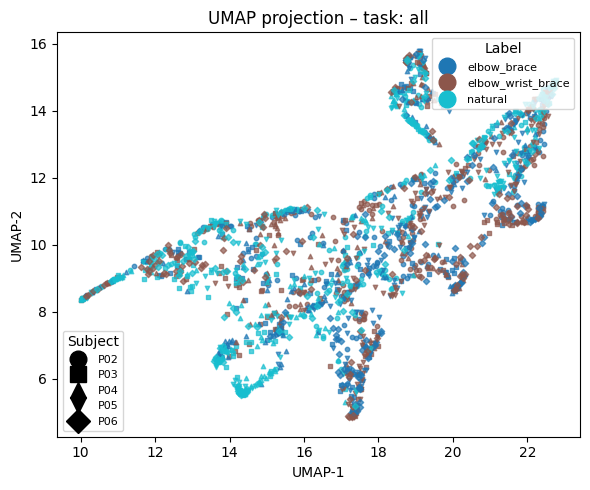

Task : cup-placing
Number of datapoints for task cup-placing : 657
......


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


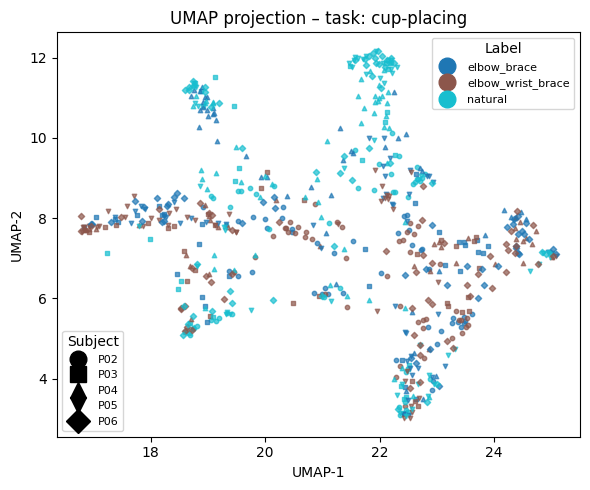

Task : peg
Number of datapoints for task peg : 547
......


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


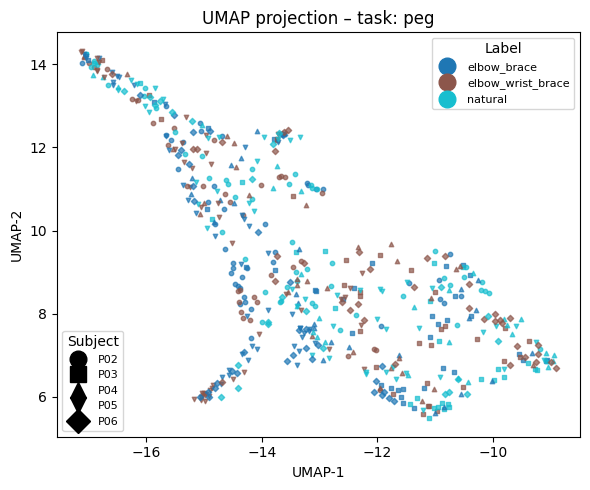

Task : wiping
Number of datapoints for task wiping : 342
......


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


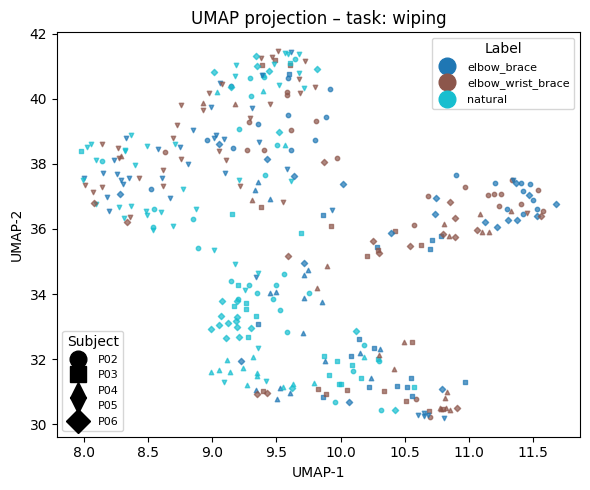

Task : pouring
Number of datapoints for task pouring : 411
......


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


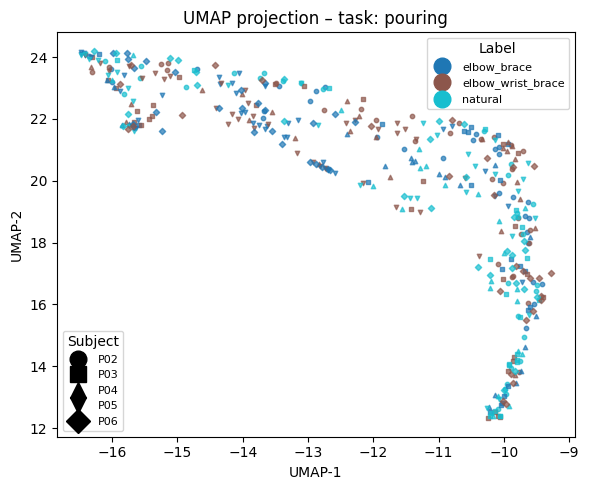

Processing windows: 100%|██████████| 5/5 [01:34<00:00, 18.93s/it]


In [4]:

for file_path, window_size in tqdm(feature_files, desc="Processing windows"):

    if window_size == "1000":
        print("Processing window :", window_size)
        df = pd.read_csv(file_path)
        df = df.loc[:, ~df.columns.str.contains("^Unnamed")]
        df, label_encoder = encode_labels(df, CONFIG["target"])


        #features = [c for c in df.columns if c not in ['subject', 'task', CONFIG["target"], 'Label']]

        ## Consider Experimental Parameters from config.py

        features = return_feature_columns(df, 
                                        sensors_to_consider=CONFIG["sensors_to_consider"], 
                                        time_features=CONFIG["time_features"], 
                                        frequency_features=CONFIG["frequency_features"], 
                                        exclude_acc=CONFIG["exclude_acc"], 
                                        exclude_gyro=CONFIG["exclude_gyro"], 
                                        exclude_mag=CONFIG["exclude_mag"], 
                                        exclude_quat=CONFIG["exclude_quat"])
        print("Considering features:", len(features))
        print("Features:", features)
        
        
        subjects = df['subject'].unique()
        tasks = df['task'].unique()


        # Do it for all tasks
        umap_projection(df, feature_columns = features, task = "all", label_encoder=label_encoder)
        for task in tasks:
            print("Task :",task)
            df_task = df[df['task'] == task]
            print("Number of datapoints for task", task, ":", df_task.shape[0])

            print("......")

            umap_projection(df_task, feature_columns = features, task = task, label_encoder=label_encoder)

In [88]:
def umap_projection_all_and_tasks(
    df,
    feature_columns,
    label_encoder,
    title_fontsize=15,
    label_fontsize=12,
    tick_fontsize=10,
):
    import numpy as np
    import matplotlib.pyplot as plt
    import umap.umap_ as umap
    from matplotlib.lines import Line2D

    # ---- data ----
    X = df[feature_columns].values
    y = df["Label"].values            # numeric labels from encode_labels
    subjects = df["subject"].values   # subject IDs
    tasks = df["task"].values         # task IDs

    # ---- uniques (global, for colors/markers & legends) ----
    unique_labels = np.unique(y)
    unique_subjects = np.unique(subjects)
    unique_tasks = np.unique(tasks)

    # up to 4 task-specific columns
    n_tasks_for_cols = min(4, len(unique_tasks))
    selected_tasks = unique_tasks[:n_tasks_for_cols]

    # label names
    try:
        label_names = label_encoder.inverse_transform(unique_labels)
    except Exception:
        label_names = [str(l) for l in unique_labels]

    # fixed colors for up to 3 conditions
    base_colors = ["blue", "green", "red"]
    label_to_color = {
        lab: (base_colors[i] if i < len(base_colors) else "gray")
        for i, lab in enumerate(unique_labels)
    }

    # markers per subject
    markers_list = ["o", "s", "^", "v", "D", "P", "X", "*", "<", ">"]
    subj_to_marker = {
        subj: markers_list[i % len(markers_list)]
        for i, subj in enumerate(unique_subjects)
    }

    # ---------- helper: fit UMAP and plot one panel ----------
    def plot_umap_panel(ax, X_panel, y_panel, subj_panel,
                        title, show_ylabel):
        # fit UMAP *only on this subset*
        reducer = umap.UMAP(
            n_components=2,
            n_neighbors=15,
            min_dist=0.1,
            metric="euclidean",
            random_state=42,
        )
        emb = reducer.fit_transform(X_panel)

        # compute square limits for this panel
        x_min, x_max = emb[:, 0].min(), emb[:, 0].max()
        y_min, y_max = emb[:, 1].min(), emb[:, 1].max()
        x_range = x_max - x_min
        y_range = y_max - y_min
        side = max(x_range, y_range)

        x_mid = 0.5 * (x_min + x_max)
        y_mid = 0.5 * (y_min + y_max)
        x_min, x_max = x_mid - 0.5 * side, x_mid + 0.5 * side
        y_min, y_max = y_mid - 0.5 * side, y_mid + 0.5 * side

        margin = 0.05 * side
        x_min -= margin
        x_max += margin
        y_min -= margin
        y_max += margin

        # scatter: color = condition, marker = subject
        for subj in unique_subjects:
            for lab, name in zip(unique_labels, label_names):
                mask = (subj_panel == subj) & (y_panel == lab)
                if not np.any(mask):
                    continue
                ax.scatter(
                    emb[mask, 0],
                    emb[mask, 1],
                    s=8,
                    alpha=0.7,
                    color=label_to_color[lab],
                    marker=subj_to_marker[subj],
                )

        ax.set_title(title, fontsize=title_fontsize)
        ax.set_xlabel("UMAP-1", fontsize=label_fontsize)
        if show_ylabel:
            ax.set_ylabel("UMAP-2", fontsize=label_fontsize)
        else:
            ax.set_ylabel("", fontsize=label_fontsize)

        ax.grid(True, linestyle=":", linewidth=0.4)
        ax.tick_params(axis="both", labelsize=tick_fontsize)
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_aspect("equal", adjustable="box")

    # ---- figure: 5 columns (all + 4 tasks) ----
    n_cols = 1 + n_tasks_for_cols
    fig, axs = plt.subplots(1, n_cols, figsize=(20, 20))
    if n_cols == 1:
        axs = np.array([axs])

    fig.subplots_adjust(left=0.06, right=0.99, top=0.90, bottom=0.26, wspace=0.1)

    # ---------- column 1: UMAP on ALL tasks ----------
    plot_umap_panel(
        ax=axs[0],
        X_panel=X,
        y_panel=y,
        subj_panel=subjects,
        title="All tasks",
        show_ylabel=True,
    )

    # ---------- task-specific columns (each with its own UMAP) ----------
    for i, task in enumerate(selected_tasks, start=1):
        mask_task = (tasks == task)
        plot_umap_panel(
            ax=axs[i],
            X_panel=X[mask_task],
            y_panel=y[mask_task],
            subj_panel=subjects[mask_task],
            title=f"Task: {task}",
            show_ylabel=False,
        )

    # ---------- shared legends (same as before) ----------
    label_handles = [
        Line2D([0], [0], marker="o", linestyle="", color=label_to_color[lab], label=name)
        for lab, name in zip(unique_labels, label_names)
    ]

    subject_handles = [
        Line2D([0], [0], marker=subj_to_marker[subj], linestyle="",
               color="black", label=str(subj))
        for subj in unique_subjects
    ]

    # Conditions legend
    fig.legend(
        handles=label_handles,
        title="Condition",
        loc="upper center",
        bbox_to_anchor=(0.75, 0.45),
        fontsize=label_fontsize,
        title_fontsize=label_fontsize,
        markerscale=1.3,
        ncol=len(label_handles),
        frameon=False,
    )

    # Subjects legend
    fig.legend(
        handles=subject_handles,
        title="Subject",
        loc="upper center",
        bbox_to_anchor=(0.35, 0.45),
        fontsize=label_fontsize,
        title_fontsize=label_fontsize,
        markerscale=1.3,
        ncol=min(len(subject_handles), 6),
        frameon=False,
    )

    plt.show()


In [ ]:
# All tasks together, but with all + subject-specific projections
umap_projection_all_and_tasks(df, feature_columns=features, label_encoder=label_encoder)


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Processing windows:   0%|          | 0/5 [00:00<?, ?it/s]

Processing window : 1000
Considering features: 845
Features: ['Quat_W_arm_l_MAX', 'Quat_X_arm_l_MAX', 'Quat_Y_arm_l_MAX', 'Quat_Z_arm_l_MAX', 'Acc_X_arm_l_MAX', 'Acc_Y_arm_l_MAX', 'Acc_Z_arm_l_MAX', 'Gyr_X_arm_l_MAX', 'Gyr_Y_arm_l_MAX', 'Gyr_Z_arm_l_MAX', 'Mag_X_arm_l_MAX', 'Mag_Y_arm_l_MAX', 'Mag_Z_arm_l_MAX', 'Quat_W_arm_l_MIN', 'Quat_X_arm_l_MIN', 'Quat_Y_arm_l_MIN', 'Quat_Z_arm_l_MIN', 'Acc_X_arm_l_MIN', 'Acc_Y_arm_l_MIN', 'Acc_Z_arm_l_MIN', 'Gyr_X_arm_l_MIN', 'Gyr_Y_arm_l_MIN', 'Gyr_Z_arm_l_MIN', 'Mag_X_arm_l_MIN', 'Mag_Y_arm_l_MIN', 'Mag_Z_arm_l_MIN', 'Quat_W_arm_l_AMP', 'Quat_X_arm_l_AMP', 'Quat_Y_arm_l_AMP', 'Quat_Z_arm_l_AMP', 'Acc_X_arm_l_AMP', 'Acc_Y_arm_l_AMP', 'Acc_Z_arm_l_AMP', 'Gyr_X_arm_l_AMP', 'Gyr_Y_arm_l_AMP', 'Gyr_Z_arm_l_AMP', 'Mag_X_arm_l_AMP', 'Mag_Y_arm_l_AMP', 'Mag_Z_arm_l_AMP', 'Quat_W_arm_l_MEAN', 'Quat_X_arm_l_MEAN', 'Quat_Y_arm_l_MEAN', 'Quat_Z_arm_l_MEAN', 'Acc_X_arm_l_MEAN', 'Acc_Y_arm_l_MEAN', 'Acc_Z_arm_l_MEAN', 'Gyr_X_arm_l_MEAN', 'Gyr_Y_arm_l_MEAN', '

c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


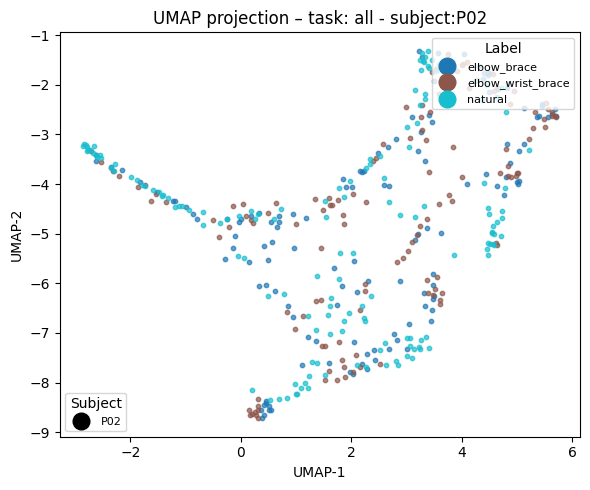

Task : cup-placing
Number of datapoints for task cup-placing : 133
......


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


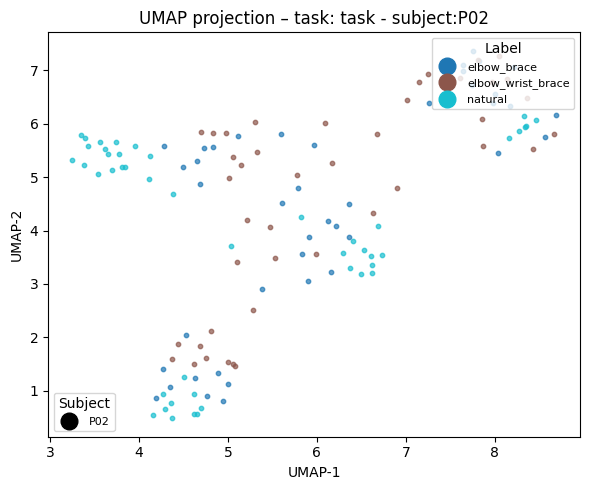

Task : peg
Number of datapoints for task peg : 127
......


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


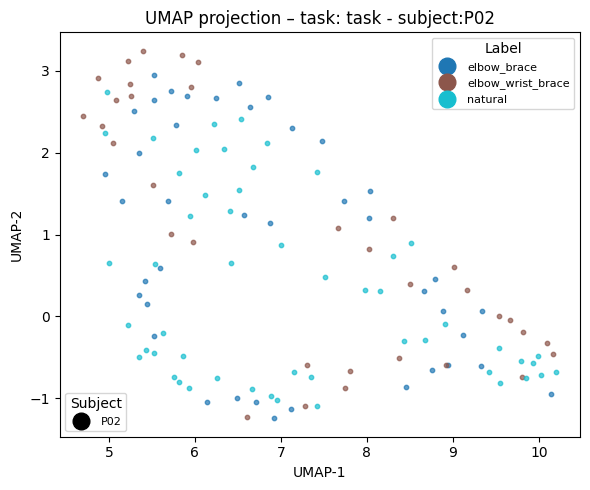

Task : wiping
Number of datapoints for task wiping : 69
......


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


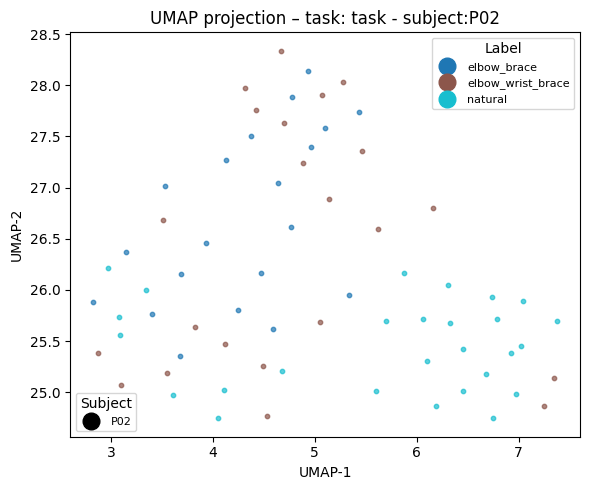

Task : pouring
Number of datapoints for task pouring : 87
......


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


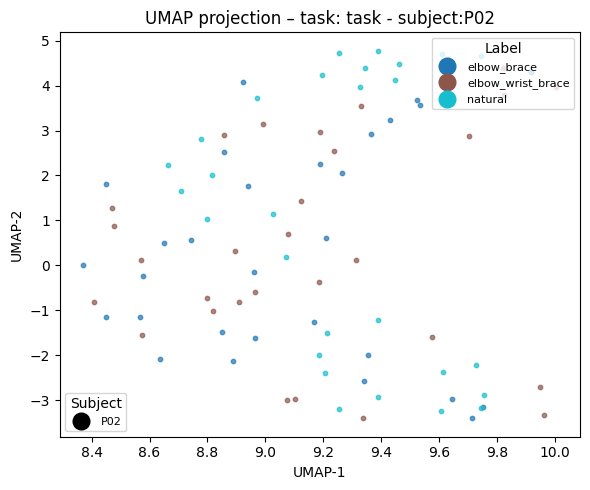

Subject : P03


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


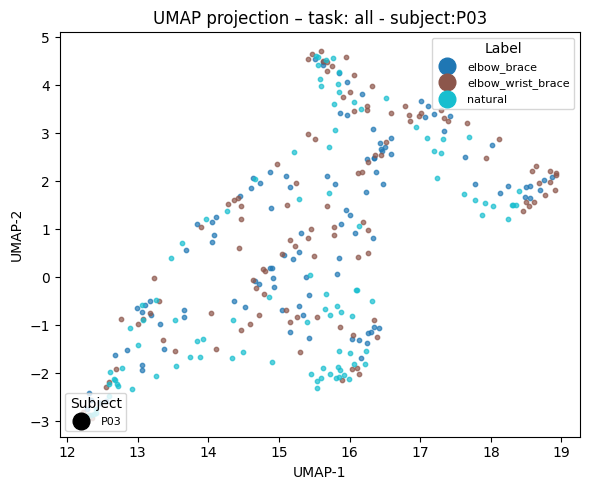

c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Task : cup-placing
Number of datapoints for task cup-placing : 97
......


C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


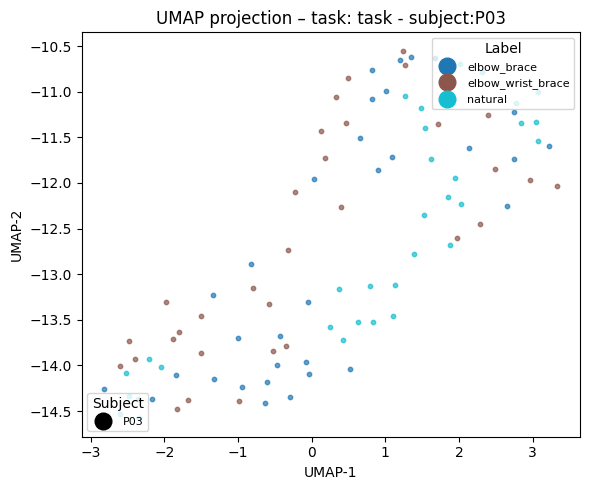

Task : peg
Number of datapoints for task peg : 93
......


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


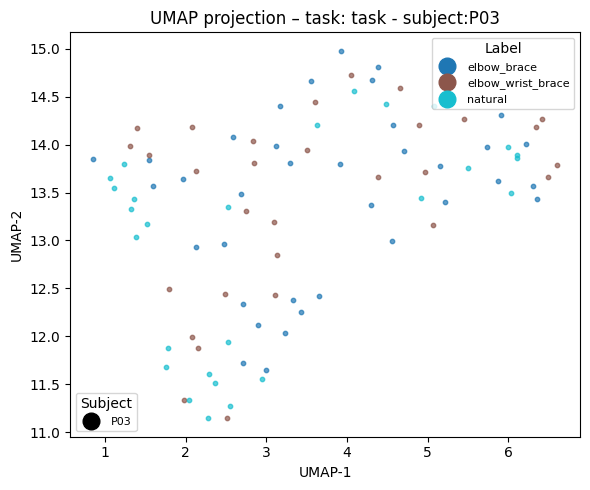

Task : wiping
Number of datapoints for task wiping : 55
......


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


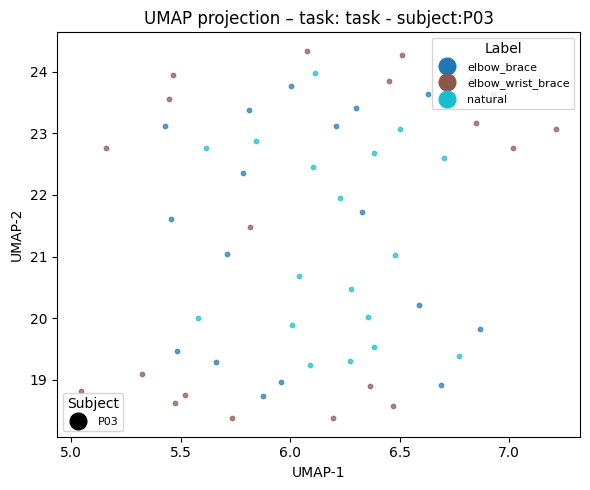

Task : pouring
Number of datapoints for task pouring : 72
......


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


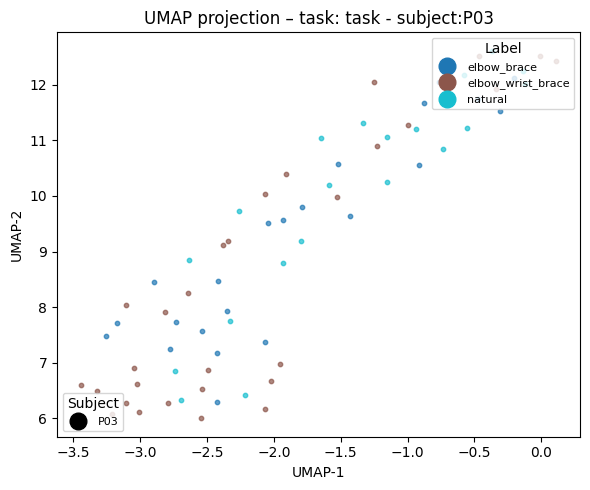

Subject : P04


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


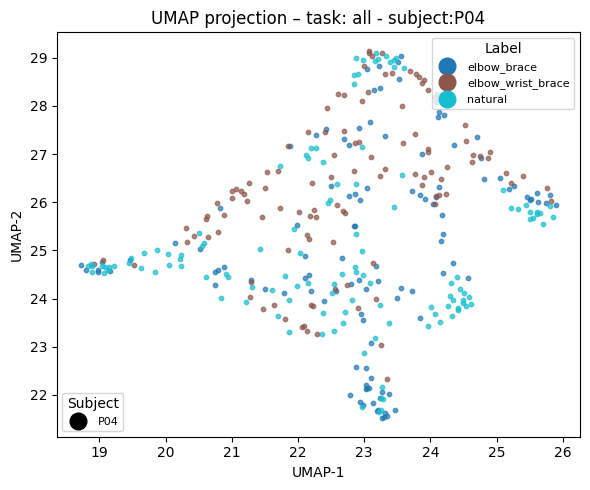

Task : cup-placing
Number of datapoints for task cup-placing : 138
......


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


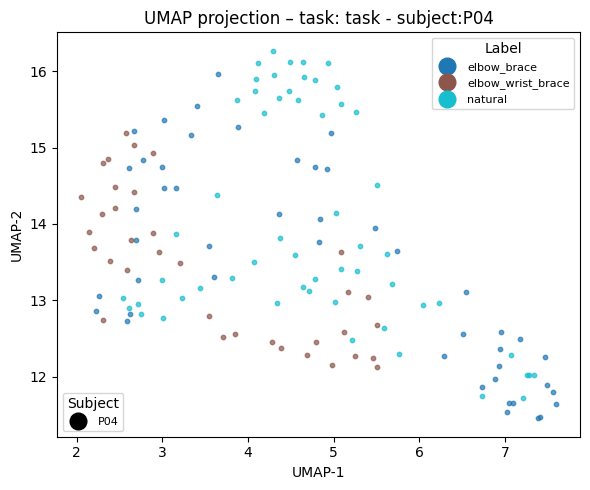

Task : peg
Number of datapoints for task peg : 90
......


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


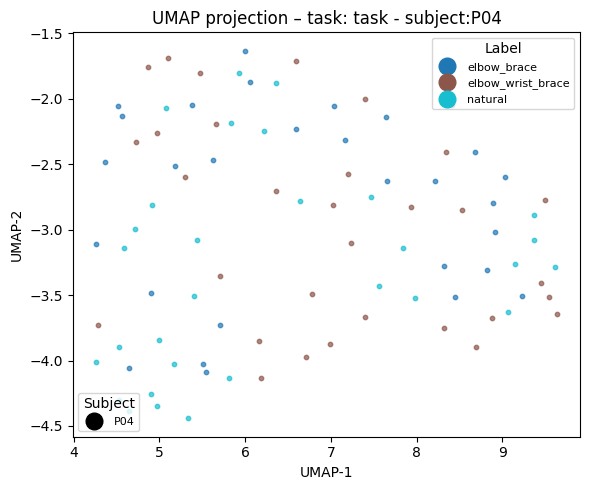

Task : wiping
Number of datapoints for task wiping : 55
......


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


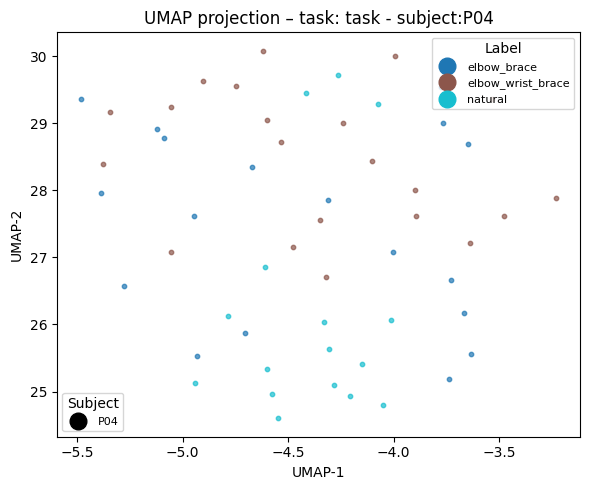

Task : pouring
Number of datapoints for task pouring : 67
......


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


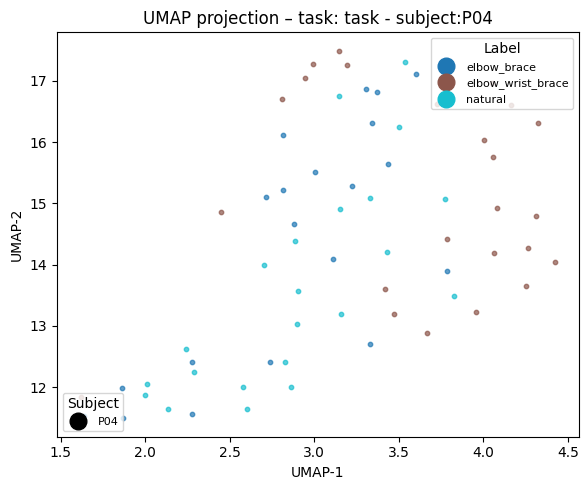

Subject : P05


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


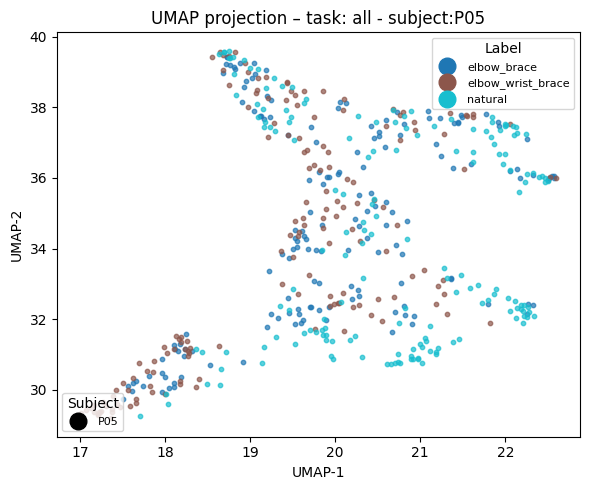

Task : cup-placing
Number of datapoints for task cup-placing : 141
......


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


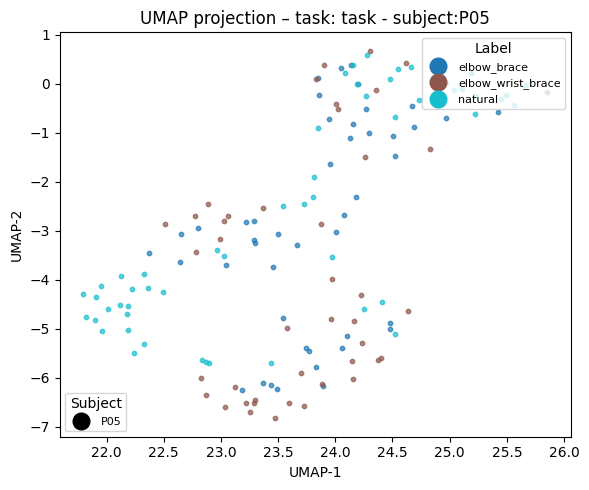

Task : peg
Number of datapoints for task peg : 141
......


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


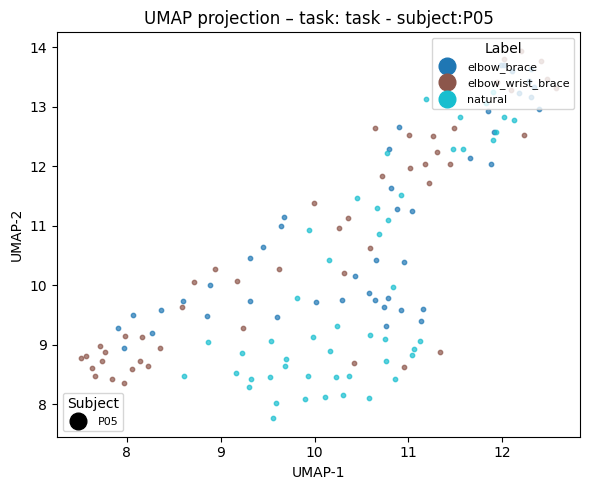

Task : wiping
Number of datapoints for task wiping : 105
......


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


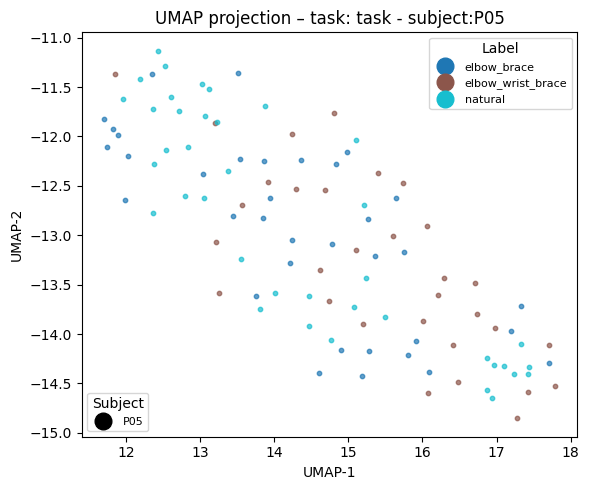

Task : pouring
Number of datapoints for task pouring : 101
......


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


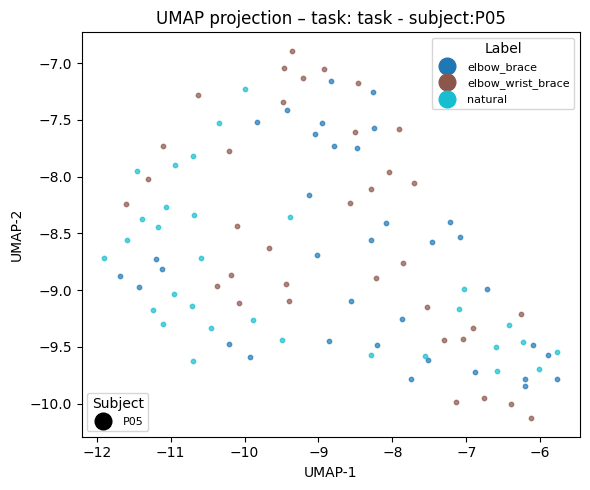

Subject : P06


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


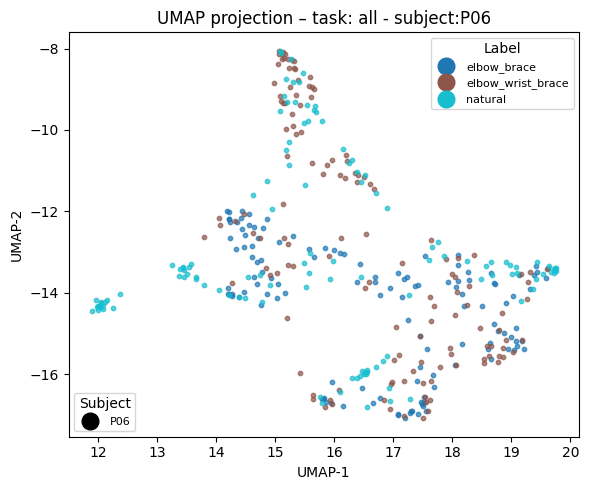

Task : cup-placing
Number of datapoints for task cup-placing : 148
......


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


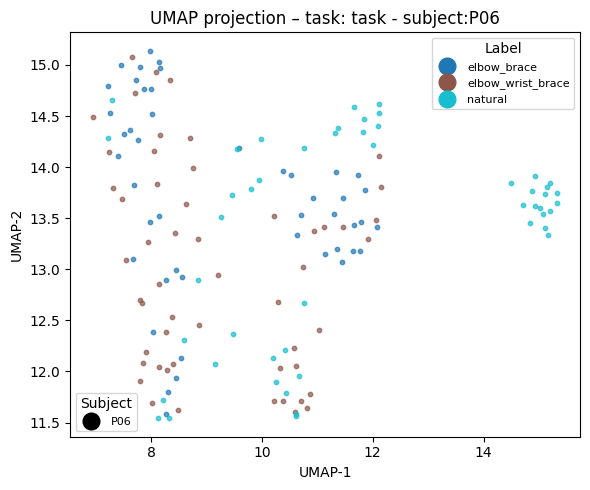

Task : peg
Number of datapoints for task peg : 96
......


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


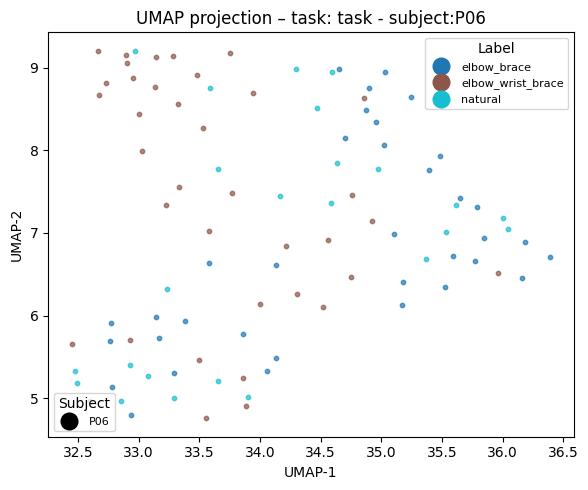

Task : wiping
Number of datapoints for task wiping : 58
......


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


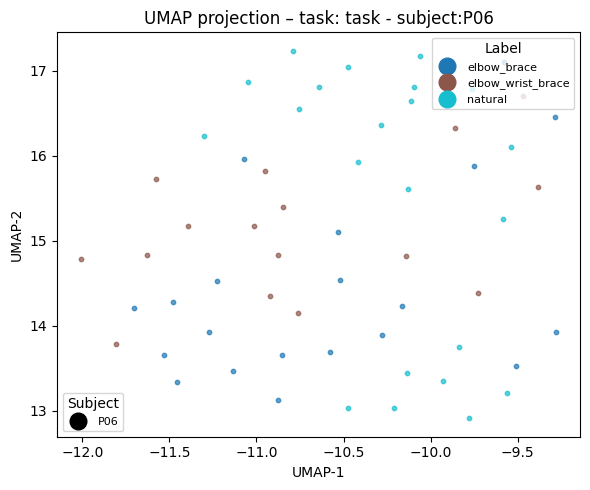

Task : pouring
Number of datapoints for task pouring : 84
......


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


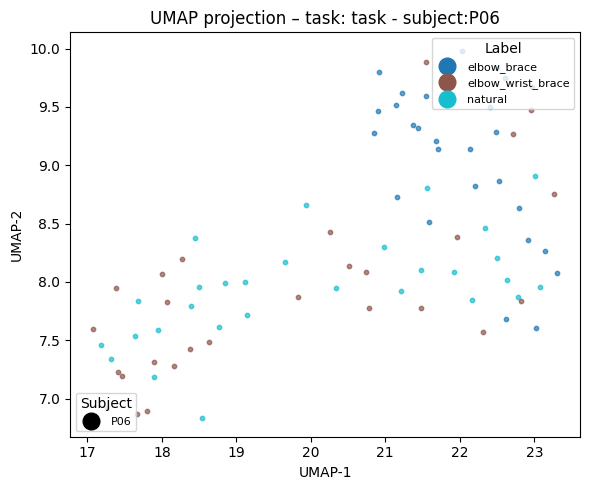

Processing windows: 100%|██████████| 5/5 [00:39<00:00,  7.97s/it]


In [5]:
# SUBJECT - SPECIFIC UMAP VISUALIZATIONS
for file_path, window_size in tqdm(feature_files, desc="Processing windows"):

    if window_size == "1000":
        print("Processing window :", window_size)
        df = pd.read_csv(file_path)
        df = df.loc[:, ~df.columns.str.contains("^Unnamed")]
        df, label_encoder = encode_labels(df, CONFIG["target"])


        #features = [c for c in df.columns if c not in ['subject', 'task', CONFIG["target"], 'Label']]

        ## Consider Experimental Parameters from config.py

        features = return_feature_columns(df, 
                                        sensors_to_consider=CONFIG["sensors_to_consider"], 
                                        time_features=CONFIG["time_features"], 
                                        frequency_features=CONFIG["frequency_features"], 
                                        exclude_acc=CONFIG["exclude_acc"], 
                                        exclude_gyro=CONFIG["exclude_gyro"], 
                                        exclude_mag=CONFIG["exclude_mag"], 
                                        exclude_quat=CONFIG["exclude_quat"])
        print("Considering features:", len(features))
        print("Features:", features)
        
        
        subjects = df['subject'].unique()
        tasks = df['task'].unique()

        # DF for a specific subject
        for subject in subjects:
            print("Subject :",subject)
            df_subj = df[df['subject'] == subject]
            # Do it for all tasks
            umap_projection(df_subj, feature_columns = features, task = f"all - subject:{subject}", label_encoder=label_encoder)
            for task in tasks:
                print("Task :",task)
                df_task = df_subj[df_subj['task'] == task]
                print("Number of datapoints for task", task, ":", df_task.shape[0])

                print("......")

                umap_projection(df_task, feature_columns = features, task = f"task - subject:{subject}", label_encoder=label_encoder)

Processing windows:   0%|          | 0/5 [00:00<?, ?it/s]

Processing window : 1000
Considering features: 169
Features: ['Quat_W_trunk_MAX', 'Quat_X_trunk_MAX', 'Quat_Y_trunk_MAX', 'Quat_Z_trunk_MAX', 'Acc_X_trunk_MAX', 'Acc_Y_trunk_MAX', 'Acc_Z_trunk_MAX', 'Gyr_X_trunk_MAX', 'Gyr_Y_trunk_MAX', 'Gyr_Z_trunk_MAX', 'Mag_X_trunk_MAX', 'Mag_Y_trunk_MAX', 'Mag_Z_trunk_MAX', 'Quat_W_trunk_MIN', 'Quat_X_trunk_MIN', 'Quat_Y_trunk_MIN', 'Quat_Z_trunk_MIN', 'Acc_X_trunk_MIN', 'Acc_Y_trunk_MIN', 'Acc_Z_trunk_MIN', 'Gyr_X_trunk_MIN', 'Gyr_Y_trunk_MIN', 'Gyr_Z_trunk_MIN', 'Mag_X_trunk_MIN', 'Mag_Y_trunk_MIN', 'Mag_Z_trunk_MIN', 'Quat_W_trunk_AMP', 'Quat_X_trunk_AMP', 'Quat_Y_trunk_AMP', 'Quat_Z_trunk_AMP', 'Acc_X_trunk_AMP', 'Acc_Y_trunk_AMP', 'Acc_Z_trunk_AMP', 'Gyr_X_trunk_AMP', 'Gyr_Y_trunk_AMP', 'Gyr_Z_trunk_AMP', 'Mag_X_trunk_AMP', 'Mag_Y_trunk_AMP', 'Mag_Z_trunk_AMP', 'Quat_W_trunk_MEAN', 'Quat_X_trunk_MEAN', 'Quat_Y_trunk_MEAN', 'Quat_Z_trunk_MEAN', 'Acc_X_trunk_MEAN', 'Acc_Y_trunk_MEAN', 'Acc_Z_trunk_MEAN', 'Gyr_X_trunk_MEAN', 'Gyr_Y_trunk_MEAN', '

c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


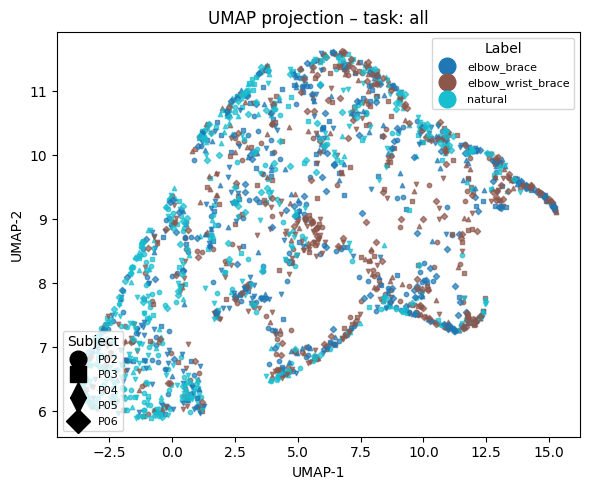

Task : cup-placing
Number of datapoints for task cup-placing : 657
......


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


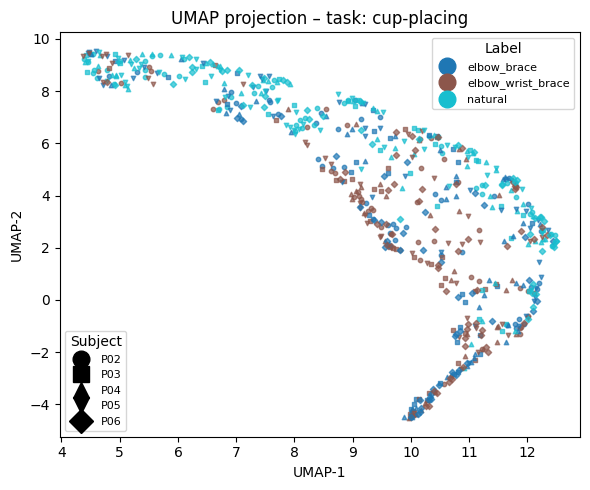

Task : peg
Number of datapoints for task peg : 547
......


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


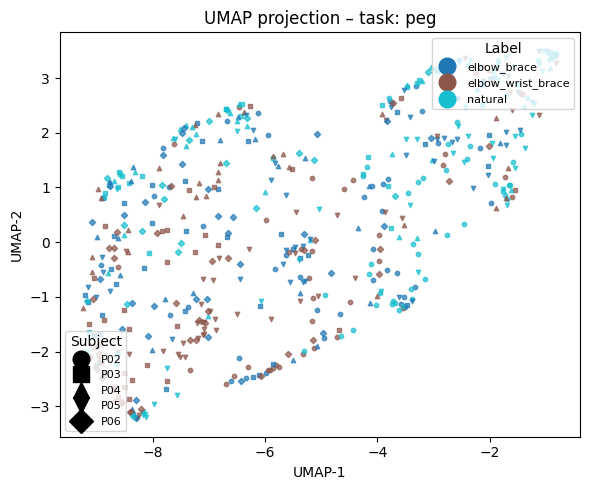

Task : wiping
Number of datapoints for task wiping : 342
......


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


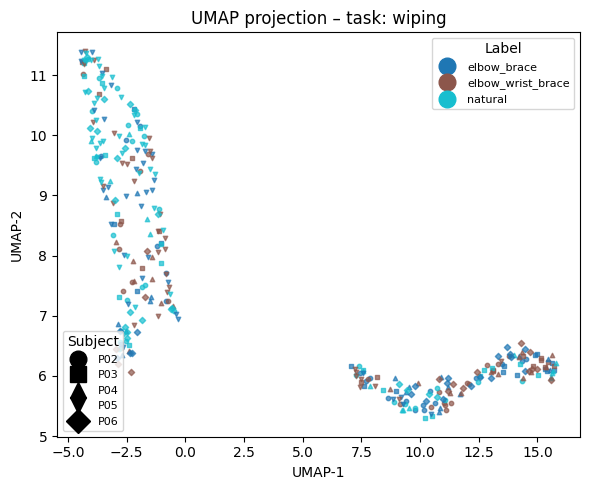

Task : pouring
Number of datapoints for task pouring : 411
......


c:\Users\giusy\anaconda3\envs\ai_health\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\giusy\AppData\Local\Temp\ipykernel_33356\3729141779.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_labels))


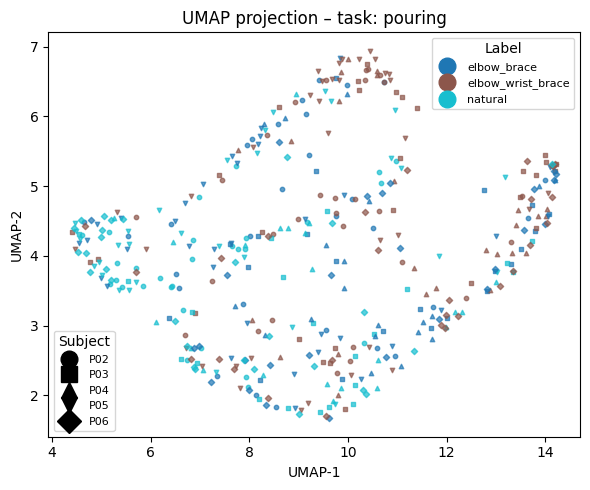

Processing windows: 100%|██████████| 5/5 [00:40<00:00,  8.07s/it]


In [6]:

for file_path, window_size in tqdm(feature_files, desc="Processing windows"):

    if window_size == "1000":
        print("Processing window :", window_size)
        df = pd.read_csv(file_path)
        df = df.loc[:, ~df.columns.str.contains("^Unnamed")]
        df, label_encoder = encode_labels(df, CONFIG["target"])


        #features = [c for c in df.columns if c not in ['subject', 'task', CONFIG["target"], 'Label']]

        ## Consider Experimental Parameters from config.py

        features = return_feature_columns(df, 
                                        sensors_to_consider=["trunk"], 
                                        time_features=CONFIG["time_features"], 
                                        frequency_features=CONFIG["frequency_features"], 
                                        exclude_acc=CONFIG["exclude_acc"], 
                                        exclude_gyro=CONFIG["exclude_gyro"], 
                                        exclude_mag=CONFIG["exclude_mag"], 
                                        exclude_quat=CONFIG["exclude_quat"])
        print("Considering features:", len(features))
        print("Features:", features)
        
        
        subjects = df['subject'].unique()
        tasks = df['task'].unique()


        # Do it for all tasks
        umap_projection(df, feature_columns = features, task = "all", label_encoder=label_encoder)
        
        for task in tasks:
            print("Task :",task)
            df_task = df[df['task'] == task]
            print("Number of datapoints for task", task, ":", df_task.shape[0])

            print("......")

            umap_projection(df_task, feature_columns = features, task = task, label_encoder=label_encoder)

In [7]:
# Note 
# For Task - Specific Models, we get
# 3 recordings per subject (for condition)
# 5 subjects
# with No window size, 15 datapoints only!


# Give an explanation from the raw data

In [8]:
from utils.load_data import *
from utils.filtering import *
from utils.visualizations import *
path = r"C:\Users\giusy\OneDrive\Desktop\AI_Healtcare\imu_compensatory_movements\Data\IMU Data"

In [9]:

# Load all subjects
data = load_all_subjects(path)

# Build raw dataset
all_subjects, dataset = build_raw_dataset(
    data, tasks=TASK_NAMES, conditions=CONDITION_NAMES
)

Done with subject P02, task cup-placing, condition natural
Done with subject P02, task cup-placing, condition elbow_brace
Done with subject P02, task cup-placing, condition elbow_wrist_brace
Done with subject P02, task peg, condition natural
Done with subject P02, task peg, condition elbow_brace
Done with subject P02, task peg, condition elbow_wrist_brace
Done with subject P02, task wiping, condition natural
Done with subject P02, task wiping, condition elbow_brace
Done with subject P02, task wiping, condition elbow_wrist_brace
Done with subject P02, task pouring, condition natural
Done with subject P02, task pouring, condition elbow_brace
Done with subject P02, task pouring, condition elbow_wrist_brace
Done with subject P02...

Done with subject P03, task cup-placing, condition natural
Done with subject P03, task cup-placing, condition elbow_brace
Done with subject P03, task cup-placing, condition elbow_wrist_brace
Done with subject P03, task peg, condition natural
Done with subject P

In [10]:
conditions = ["natural", "elbow_wrist_brace", "elbow_brace"]
sensor_names = CONFIG["sensors_to_consider"]

In [11]:
df['task'].unique()

array(['cup-placing', 'peg', 'wiping', 'pouring'], dtype=object)

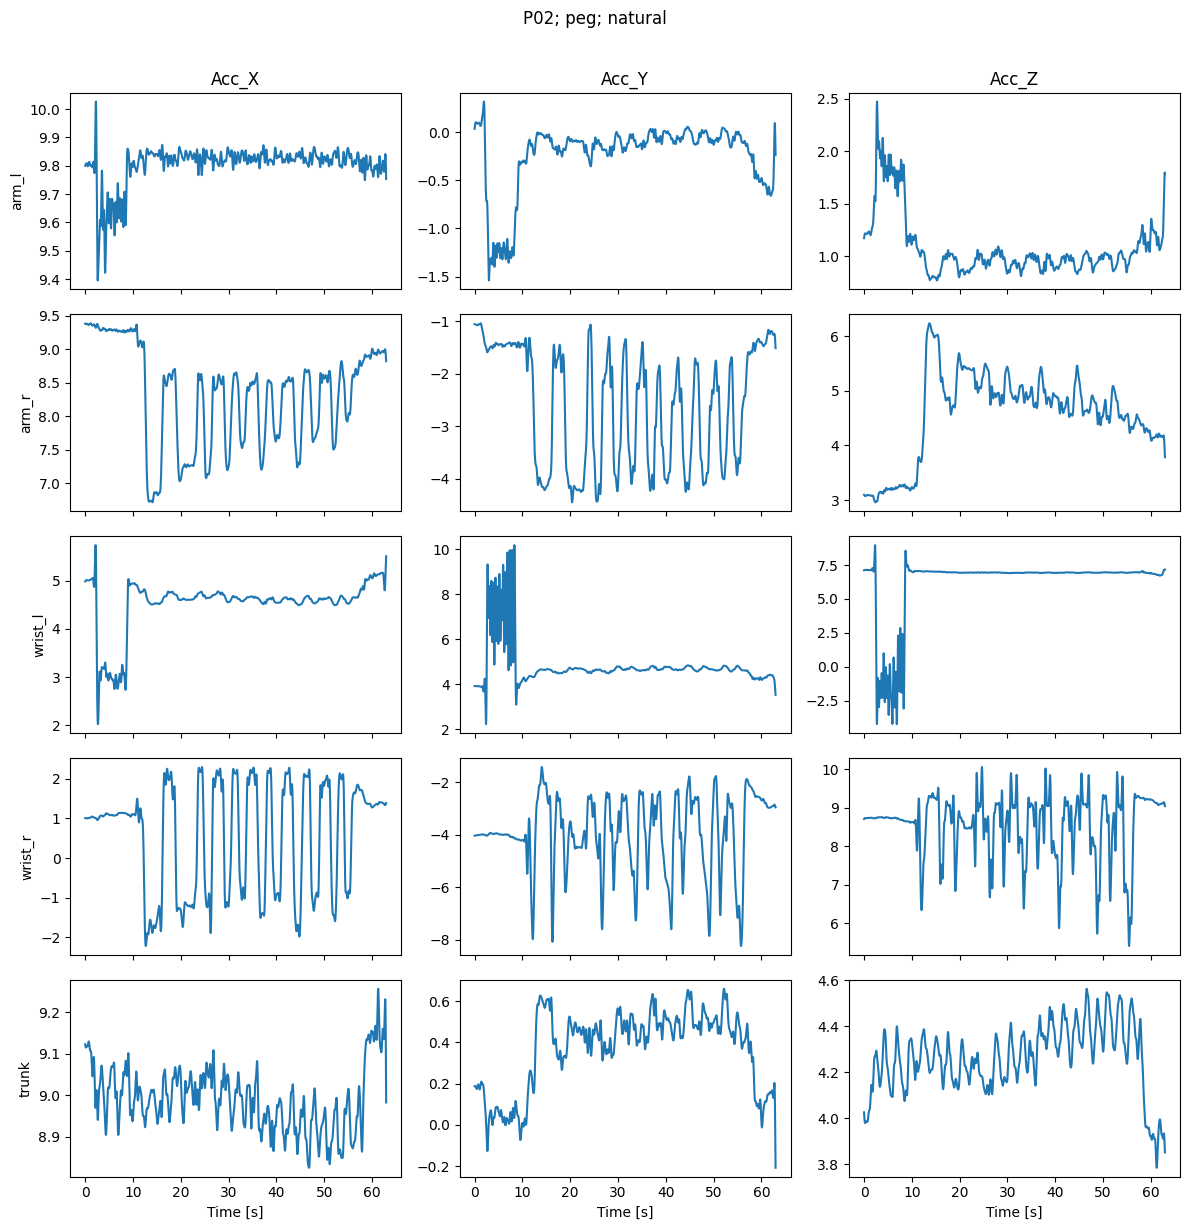

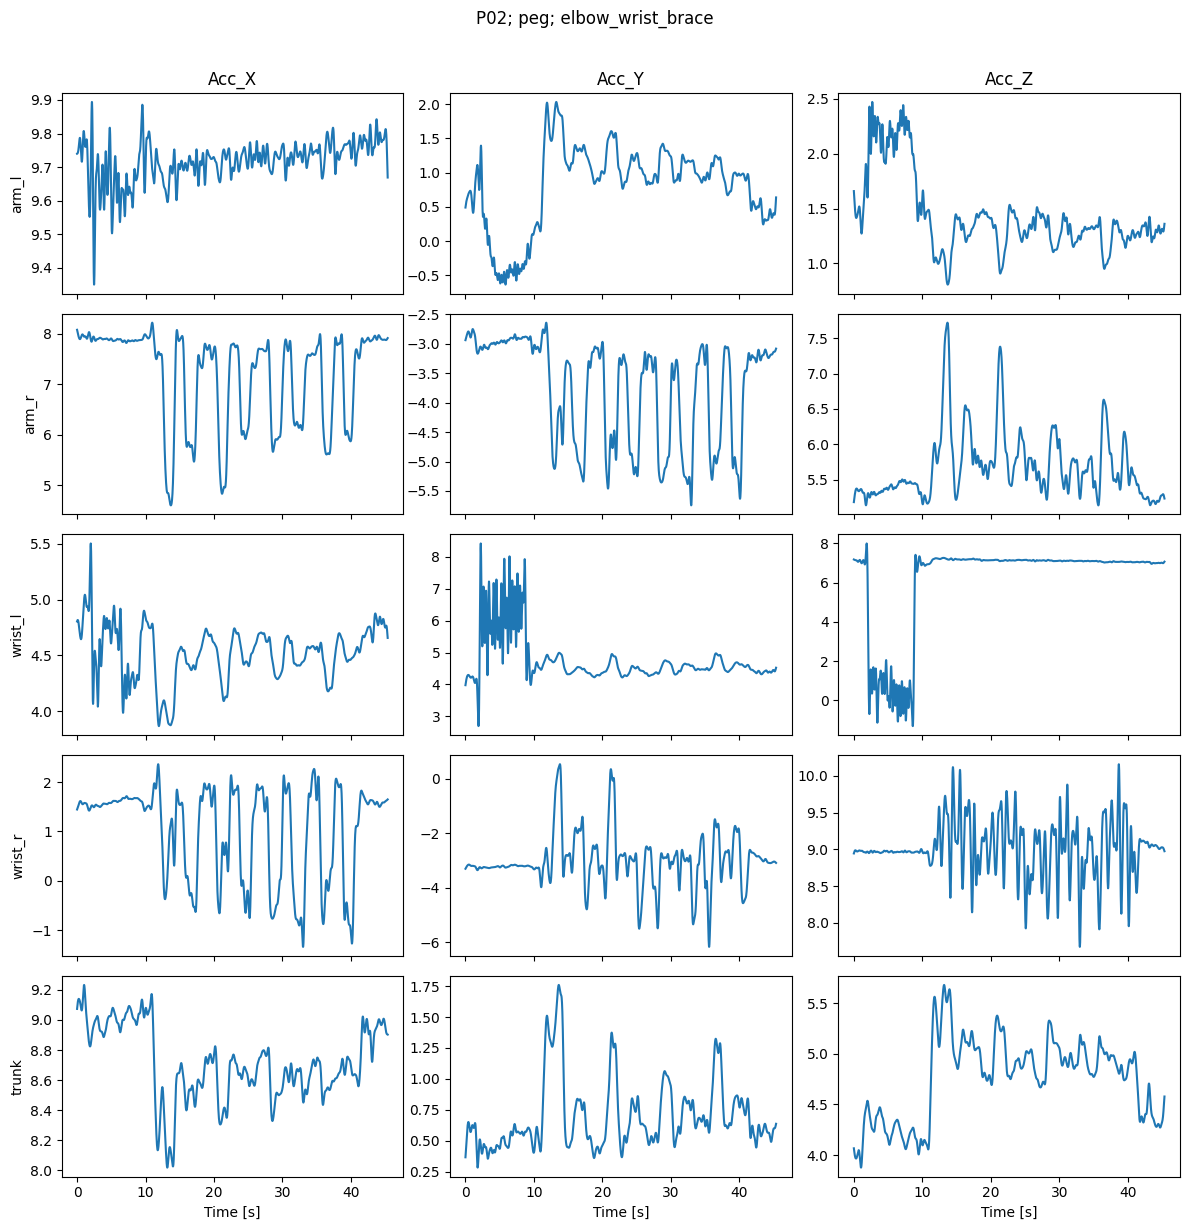

KeyboardInterrupt: 

In [12]:
# Inspect some data
sub_id = 'P02'
task_name = 'peg'

for condition in conditions:
    df_raw = dataset[sub_id][task_name][condition]
    df_filt = filter_butterworth(df_raw, fs=60, cutoff=2)
    plot_imus_5x3(df_filt, sensor_names, title= f"{sub_id}; {task_name}; {condition}")

In [ ]:

def plot_imus_5x3(df_raw, sensor_names, base_signals=None, fs=60, title=None):
    """
    df_raw:      dataframe with columns like 'AccX_IMU1', 'AccY_IMU1', ...
    sensor_names: list of 5 sensor names, e.g. ['IMU1', 'IMU2', ...]
    base_signals: list of base names to plot per IMU, e.g. ['AccX', 'AccY', 'AccZ']
    fs:          sampling frequency (for time axis), default 60 Hz
    """
    if base_signals is None:
        base_signals = ['Acc_X', 'Acc_Y', 'Acc_Z']   # 3 signals per IMU

    n_sensors = len(sensor_names)
    n_signals = len(base_signals)

    # time axis (if you don't have time column)
    n_samples = len(df_raw)
    t = np.arange(n_samples) / fs

    fig, axes = plt.subplots(
        nrows=n_sensors,
        ncols=n_signals,
        figsize=(4 * n_signals, 2.5 * n_sensors),
        sharex=True
    )

    # If only one sensor or one signal, axes might not be 2D
    if n_sensors == 1:
        axes = np.expand_dims(axes, axis=0)
    if n_signals == 1:
        axes = np.expand_dims(axes, axis=1)

    for i, sensor_name in enumerate(sensor_names):
        for j, base in enumerate(base_signals):
            ax = axes[i, j]

            col_name = f"{base}_{sensor_name}"
            if col_name not in df_raw.columns:
                ax.text(0.5, 0.5, f"{col_name}\nnot found", ha='center', va='center')
                ax.set_axis_off()
                continue

            y = df_raw[col_name].values
            ax.plot(t, y)

            # Titles / labels
            if i == 0:
                ax.set_title(base)          # AccX / AccY / AccZ on top row
            if j == 0:
                ax.set_ylabel(sensor_name)  # IMU name on left column

            if i == n_sensors - 1:
                ax.set_xlabel("Time [s]")
    if title:
        plt.suptitle(title)

    fig.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()
